# Finite Difference Numerical Methods.
# Vibrating String with Fixed Ends.
# Tommy, Wen Chin.

### Non-dispersive Linear Wave Equation:
# $\frac{\partial^2 u}{\partial t^2} = v^2 \frac{\partial^2 u}{\partial x^2}, \qquad 0<x<L, \qquad 0<t,$
### Dirichlet Boundary Conditions: 
# $u(0,t) = 0, \qquad u(L,t) = 0,$
### Initial Conditions:
# $u(x,0) = f(x) \qquad \frac{\partial u}{\partial t} (x,0) = 0.$

### Script Notation:
# $x_j = j \Delta x, \qquad t_m = m \Delta t,$
# $u(x_j,t_m) = u^m_j, \qquad u(x_j + \Delta x,t_m) = u^m_{j+1}, \qquad u(x_j,t_m + \Delta t) = u^{m+1}_j,$
### Forward Euler for $1^{st}$ Derivative in TIme:
# $\frac{\partial u}{\partial t} = \frac{u^{m+1}_j - u^{m}_j}{\Delta t},$
### Central Difference for both $2^{nd}$ Derivatives in Space and Time:
# $\frac{\partial^2 u}{\partial t^2} = \frac{u^{m+1}_j - 2 u^m_j + u^{m-1}_j}{{\Delta t}^2}, \qquad \frac{\partial^2 u}{\partial x^2} = \frac{u^m_{j+1} - 2 u^m_j + u^m_{j-1}}{{\Delta x}^2},$
### Wave Equation (Partial Difference Equation):
# $\frac{u^{m+1}_j - 2 u^m_j + u^{m-1}_j}{{\Delta t}^2} = v^2 \frac{u^m_{j+1} - 2 u^m_j + u^m_{j-1}}{{\Delta x}^2}, \qquad 0<x_j< x_J, \qquad 0<t_m,$
### BCs:
# $u^m_0 = 0, \qquad u^m_J = 0,$
### ICs:
# $u^0_j = f(x_j), \qquad \frac{u^{1}_j - u^{0}_j}{\Delta t} = 0 \implies u^{1}_j = u^{0}_j = f(x_j),$
### Marching Forward in Time:
# $u^{m+1}_j = 2 u^n_j - u^{n-1}_j + \frac{v^2 {\Delta t}^2}{{\Delta x}^2} [u^m_{j+1} - 2 u^m_j + u^m_{j-1}].$

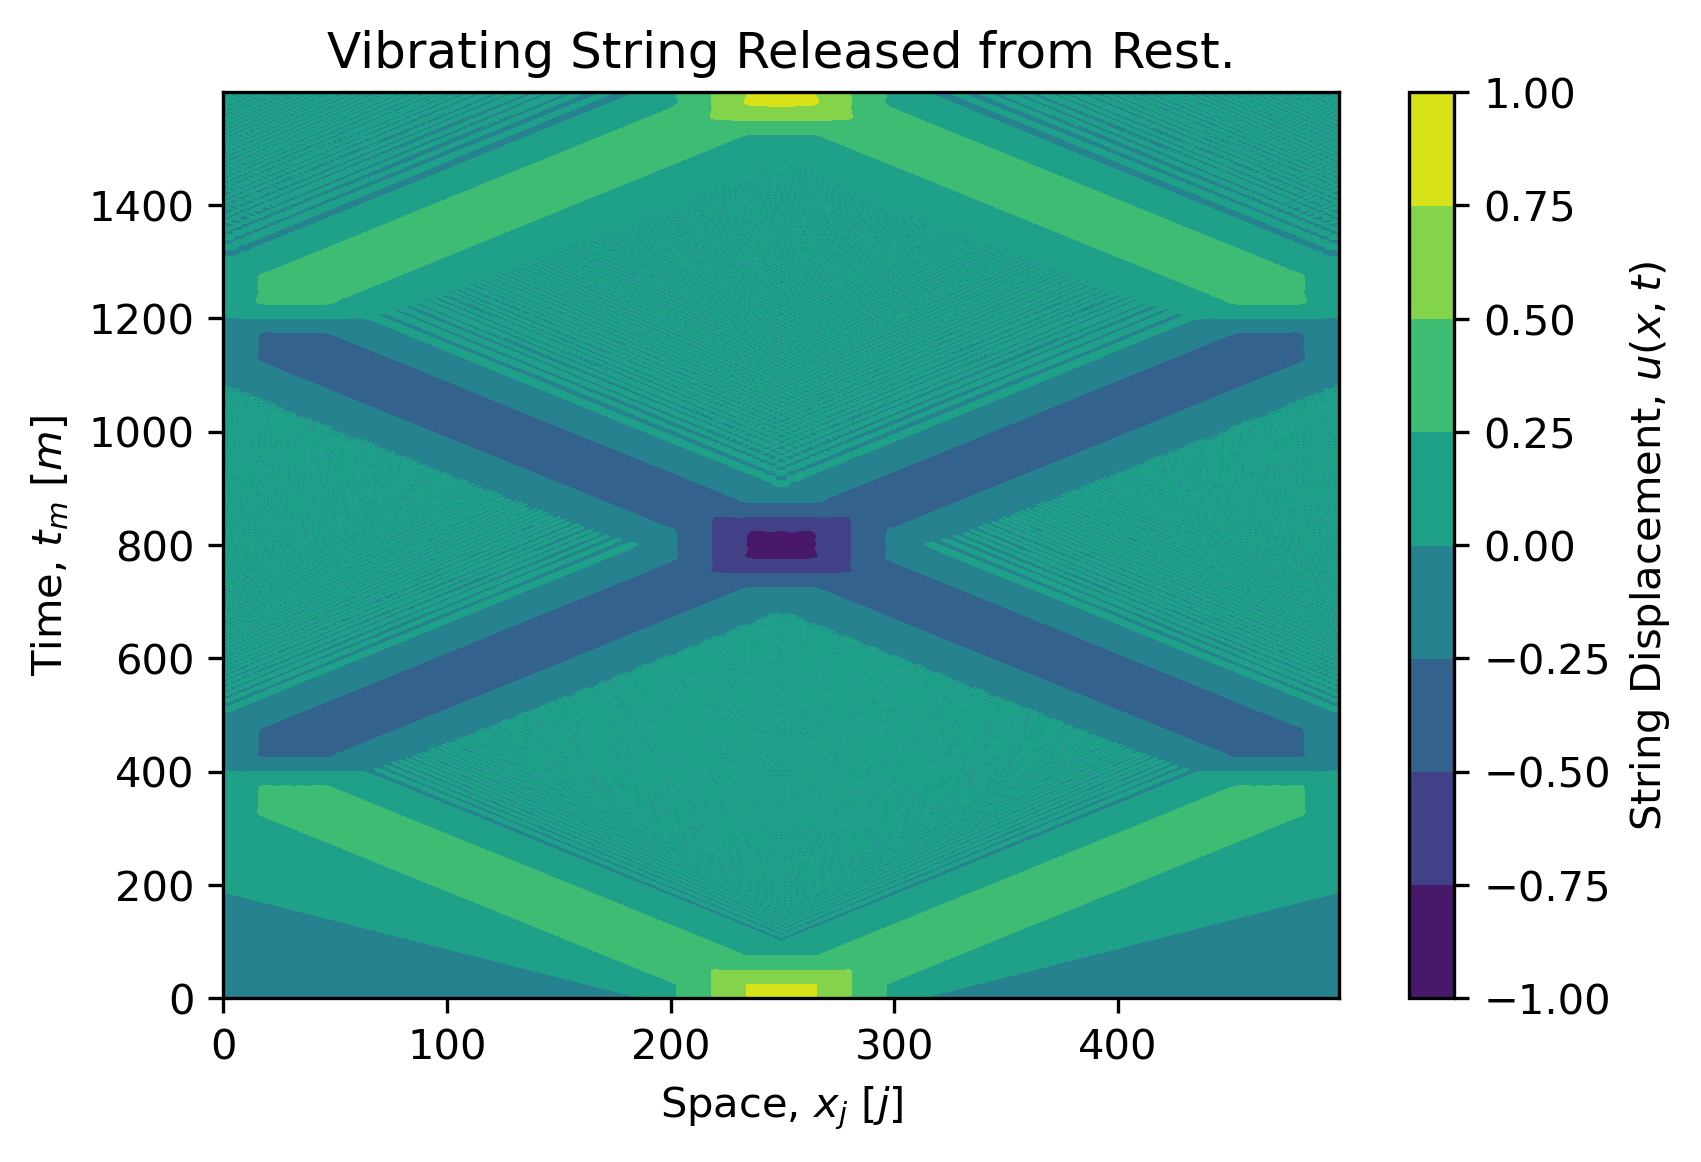

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set system size (L)
L = 8.

# Set wave velocity
v = 1.

# Set resolution in space (J, dx)
J = 500
x = np.linspace(0., L, J)
dx = x[1] - x[0]

# Set resolution in time (M, dt)
dt = 0.01
M = 1600
tM = M * dt
t = np.linspace(0., tM, M)

# Memory allocation
u = np.zeros((M, J))

# Initial condition
# Triangle center position
x0 = L / 2.
# Triangle width
b = 2.


# Triangle function
def f(x):
    if (x <= (x0 - b / 2.)) or (x >= (x0 + b / 2.)):
        y = 0
    elif (x > (x0 - b / 2.)) and (x <= x0):
        y = x - (x0 - b / 2.)
    elif (x > x0) and x < ((x0 + b / 2.)):
        y = (x0 + b / 2.) - x
    return y


k = (v * dt / dx) * (v * dt / dx)

for j in range(1, J - 1):
    u[0, j] = f(x[j])
    u[1, j] = f(x[j]) + k * (f(x[j + 1]) - 2 * f(x[j]) + f(x[j - 1]))

for m in range(1, M - 1):
    u[m + 1, 1:J - 1] = 2. * u[m, 1:J - 1] - u[
        m - 1, 1:J - 1] + k * (u[m, 2:J] - 2. * u[m, 1:J - 1] + u[m, 0:J - 2])
    
plt.figure(dpi=300)
plt.contourf(u)
plt.title('Vibrating String Released from Rest.')
plt.xlabel('Space, $x_j\ [j]$')
plt.ylabel('Time, $t_m\ [m]$')
plt.colorbar(label='String Displacement, $u(x,t)$')
plt.show()

# Animation

<IPython.core.display.Javascript object>


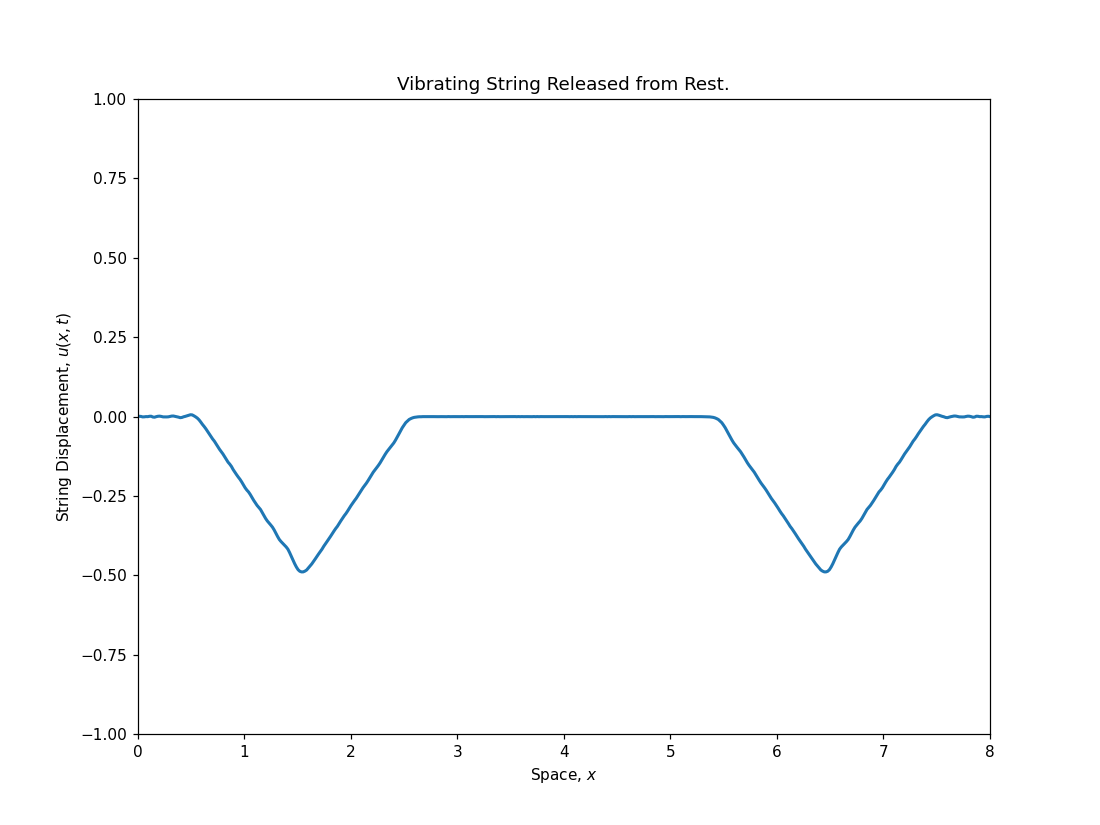

In [2]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 7.5))
ax = plt.axes(xlim=(0, L), ylim=(-1, 1))
ax.set_title('Vibrating String Released from Rest.')
ax.set_xlabel('Space, $x$')
ax.set_ylabel('String Displacement, $u(x,t)$')
line, = ax.plot([], [], lw=2)


def init():
    line.set_data([], [])
    return line,


def animate(i):
    line.set_data(x[:], u[i, :])
    return line,


anim = FuncAnimation(fig,
                     animate,
                     init_func=init,
                     frames=M,
                     interval=5,
                     blit=True)